In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pyometiff import OMETIFFReader

In [43]:
nuclear_image_segmentation_fov0 = Image.open(r"C:\Users\miles\GitHub\ark-analysis-implementation\data_processing\segmentation\deepcell_output\fov0_nuclear.tiff")
membrane_image_segmentation_fov0 = Image.open(r"C:\Users\miles\GitHub\ark-analysis-implementation\data_processing\segmentation\deepcell_output\fov0_whole_cell.tiff")
segmentation_borders = Image.open(r"data_processing\segmentation\deepcell_visualization\fov0_segmentation_borders.tiff")
overlay_image = Image.open()


In [33]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 0), (0.5, 0, 0.5)]  # Black to purple
purple_cmap = LinearSegmentedColormap.from_list('black_to_purple', colors, N=256)
colors = [(0, 0, 0), (1, 0, 1)]  # Black to magenta
magenta_cmap = LinearSegmentedColormap.from_list('black_to_magenta', colors, N=256)
colors = [(0, 0, 0), (0.6, 0.8, 1)]  # Black to light blue
blue_cmap = LinearSegmentedColormap.from_list('black_to_light_blue', colors, N=256)

In [44]:
actual_image = r"data_processing\raw_image_data\Mx_SA TMA 5_J01.ome.tif"
reader = OMETIFFReader(fpath=actual_image)
actual_image, metadata, xml_metadata = reader.read()

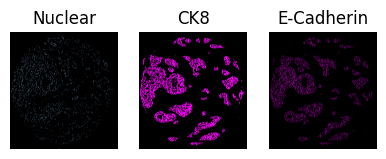

In [41]:
image1 = actual_image[0]
image2 = actual_image[5]
image3 = actual_image[7]

plt.subplot(1, 4, 1)
plt.imshow(image1, cmap=blue_cmap)
plt.title('Image 1')
plt.axis('off')
plt.title("Nuclear")

plt.subplot(1, 4, 2)
plt.imshow(image2, cmap=magenta_cmap)
plt.title('Image 2')
plt.axis('off')
plt.title("CK8")

plt.subplot(1, 4, 3)
plt.imshow(image3, cmap=purple_cmap)
plt.title('Image 3')
plt.axis('off')
plt.title("E-Cadherin")

plt.show()

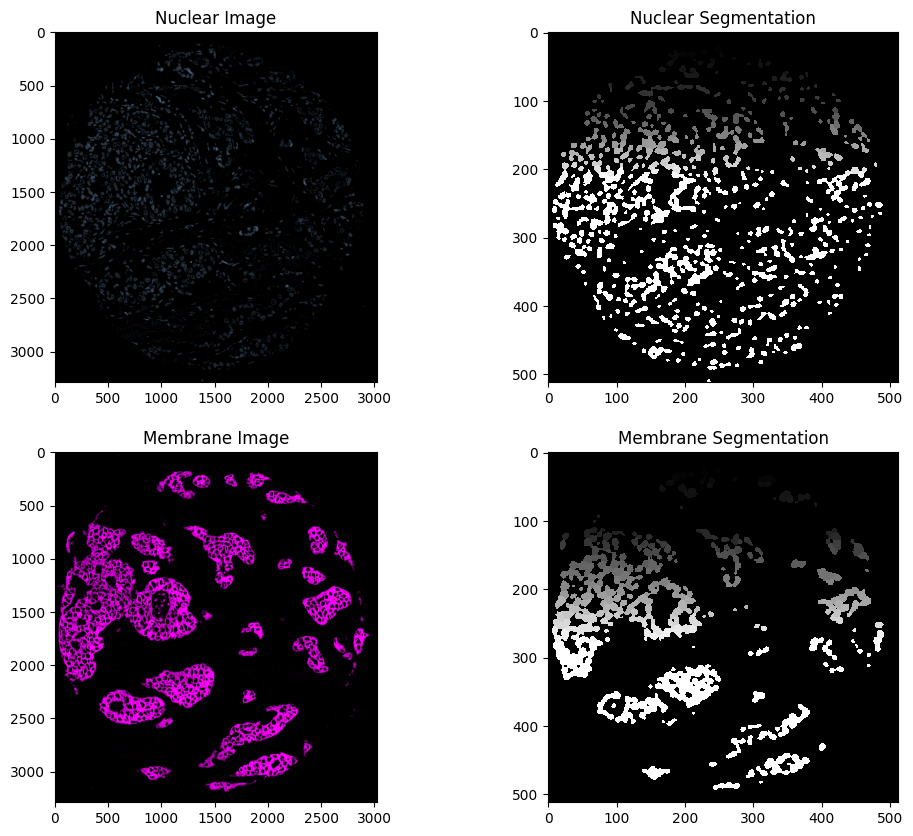

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0,0].imshow(actual_image[0], cmap = blue_cmap)
ax[0,1].imshow(nuclear_image_segmentation_fov0,interpolation='none')
ax[1,0].imshow(actual_image[5],cmap=magenta_cmap)
ax[1,1].imshow(membrane_image_segmentation_fov0,interpolation='none')
ax[0,0].set_title("Nuclear Image")
ax[0,1].set_title("Nuclear Segmentation")
ax[1,0].set_title("Membrane Image")
ax[1,1].set_title("Membrane Segmentation")

plt.savefig("Comparison2.png")
plt.show()


Text(0.5, 1.0, 'Segmentation Borders')

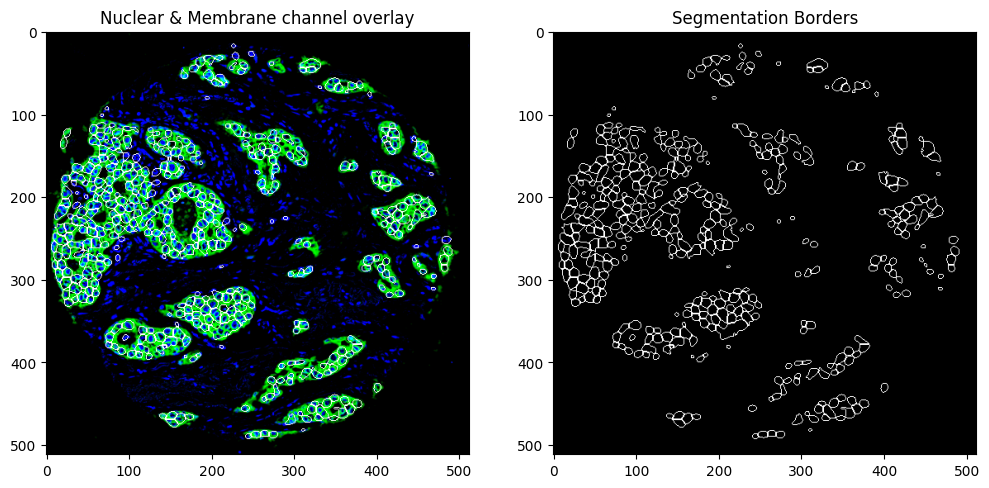

In [56]:
x = Image.open(r"C:\Users\miles\GitHub\ark-analysis-implementation\data_processing\segmentation\deepcell_visualization\fov0_nuclear_channel_membrane_channel_overlay.tiff")
y = Image.open(r"C:\Users\miles\GitHub\ark-analysis-implementation\data_processing\segmentation\deepcell_visualization\fov0_segmentation_borders.tiff")
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax[0].imshow(x, magenta_cmap)
ax[1].imshow(y,cmap = "gist_gray")
ax[0].set_title("Nuclear & Membrane channel overlay")
ax[1].set_title("Segmentation Borders")
